<a href="https://colab.research.google.com/github/22053604/Cardiovascular-Health-Analysis/blob/main/Development_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Version Control**

# Pseudocode Cardiovasular Dasebase Analysis

1. Import necessary libraries
   - Import `sqlite3`, `pandas`, `numpy`, `matplotlib.pyplot`, and `ipywidgets`.

2. Establish a connection to the SQLite database.
   - Define the database path.
   - Attempt to connect to the database.
   - If an error occurs, handle and display the connection error.

3. Retrieve and display table names in the database.
   - Execute SQL query to get table names.
   - Print the retrieved table names.

4. Export all tables to CSV files and load them into Pandas DataFrames.
   - For each table, read data using SQL query.
   - Save the data into a CSV file.
   - Print confirmation of successful export.

5. Load the 'medical_examination' table into a Pandas DataFrame.
   - Load data from the specified CSV file.
   - Print the first few rows of the loaded DataFrame.

6. Handle missing values and duplicates.
   - Display missing values in the dataset.
   - Remove duplicate rows.
   - Print cleaned data.

7. Convert age from days to years.
   - Add a new column for age in years by converting 'age' from days.

8. Categorize age into bins.
   - Define age bins and labels.
   - Create a new column with age groups based on the bins.

9. Transform categorical data columns into readable formats.
   - Update columns such as 'cholesterol', 'glucose', 'gender', etc., with more meaningful values.

10. Display the cleaned data.

11. Define a function to create visualizations.
    - Create an interactive visualization function, allowing for filtering by age group and gender.
    - Create plots such as:
      - Age group vs cardiovascular disease.
      - Gender vs smoking status.
      - Cholesterol vs physical activity by gender.
      - Correlation heatmap for numeric data.
    - Handle errors for missing columns during visualization.

12. Create widgets for user interaction.
    - Create dropdown widgets for age group and gender selection.

13. Create interactive visualizations.
    - Use widgets to create an interactive plot and display it.

14. Generate specific demographic and lifestyle combinations.
    - Create subsets of data based on conditions (e.g., female smokers, age > 50 with high cholesterol).
    - Print the subset data.

15. Create histogram of age distribution for specific criteria.
    - Filter data based on criteria (e.g., age > 40, high BP, active).
    - Create and display a histogram for age distribution.



In [ ]:
#import necessary libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [ ]:
#Established a connection to the SQLite database
db_path = '/content/cardio_health.db'
conn = sqlite3.connect('cardiohealth.db')
cursor = conn.cursor()

#Function for error if problem connecting to SQLite database
try:
    conn = sqlite3.connect('cardiohealth.db')
except sqlite3.Error as e:
    print(f"Error connecting to database: {e}")

#Retrieve and display table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in the database:", tables)

Tables in the database: [('medical_examination',)]


In [ ]:
#Export all tables to CSV files &  Panadas dataframe
for table_name in tables:
    df = pd.read_sql(f"SELECT * FROM {table_name[0]}", conn)
    csv_file_name = f"{table_name[0]}.csv"
    df.to_csv(csv_file_name, index=False)
    print(f"Exported {table_name[0]} to {csv_file_name}")

#Load data from medical_examnination table
query = "SELECT * FROM medical_examination"
df = pd.read_sql(query, conn)

#Display tables
df = pd.read_csv('/content/medical_examination.csv')
print(df.head())

Exported medical_examination to medical_examination.csv
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [ ]:
#Show the missing values
print("Missing values in dataset: ")
print(df.isnull().sum())

# Remove duplicates and handle missing values
df_cleaned = df.drop_duplicates()

#Print table again after removing duplicates
print("After removing duplicates:")
print(df_cleaned.head())

#Converting age from days to years
df_cleaned['age_years'] = df['age'] / 365



Missing values in dataset: 
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64
After removing duplicates:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [ ]:
#Grouping into category groups

#Define Age into bins and labels
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-9', '10-19','20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']
#Create age columns
df_cleaned['age_group'] = pd.cut(df_cleaned['age_years'], bins=age_bins, labels=age_labels, right=False)


#Transform Categorial Data columns into understandable format

#Transform Cholesterol levels into readable categories
df_cleaned['cholesterol'] = df_cleaned['cholesterol'].map({1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'})

#Transform Glucose levels into readable categories
df_cleaned['glucose'] = df_cleaned['gluc'].map({1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'})

#Transform Gender codes into understandable format (1 = female, 2 = male)
df_cleaned['gender'] = df_cleaned['gender'].map({1: 'Female', 2: 'Male'})

#Transform Smoker codes into understandable format (0 = non-smoker, 1 = smoker)
df_cleaned['smoking_status'] = df_cleaned['smoke'].map({0: 'Non-smoker', 1: 'Smoker'})

#Transform Drinker codes into understandable format (0 = non-drinker, 1 = drinker)
df_cleaned['alcohol_consumption'] = df_cleaned['alco'].map({0: 'Non-drinker', 1: 'Drinker'})

#Transform Active codes into understandable format (0 = inactive, 1 = active)
df_cleaned['physical_activity'] = df_cleaned['active'].map({0: 'Inactive', 1: 'Active'})

#Transform Cardio Disease codes into understandable format (0 = no disease, 1 = disease)
df_cleaned['cardio_disease_presence'] = df_cleaned['cardio'].map({0: 'No Disease', 1: 'Disease'})


#Display the cleaned data
print(df_cleaned.head())





   id    age  gender  height  weight  ap_hi  ap_lo        cholesterol  gluc  \
0   0  18393    Male     168    62.0    110     80             Normal     1   
1   1  20228  Female     156    85.0    140     90  Well Above Normal     1   
2   2  18857  Female     165    64.0    130     70  Well Above Normal     1   
3   3  17623    Male     169    82.0    150    100             Normal     1   
4   4  17474  Female     156    56.0    100     60             Normal     1   

   smoke  alco  active  cardio  age_years age_group glucose smoking_status  \
0      0     0       1       0  50.391781     50-59  Normal     Non-smoker   
1      0     0       1       1  55.419178     50-59  Normal     Non-smoker   
2      0     0       0       1  51.663014     50-59  Normal     Non-smoker   
3      0     0       1       1  48.282192     40-49  Normal     Non-smoker   
4      0     0       0       0  47.873973     40-49  Normal     Non-smoker   

  alcohol_consumption physical_activity cardio_disease_p

In [ ]:
print(df.head())
print(df.dtypes)


   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


# Data Functions & Graph Visualisations

In [34]:
# Function to create visualizations
def create_visualisations(age_filter, gender_filter):
    filtered_df = df_cleaned.copy()

    #Filter Dataframe based on widget inputs
    if age_filter != "All":
        filtered_df = filtered_df[filtered_df['age_group'] == age_filter]
    if gender_filter != "All":
        filtered_df = filtered_df[filtered_df['gender'] == gender_filter]


    # Plot 1: Age Group vs Cardiovascular Disease
    plt.figure(figsize=(10, 6))
    # Ensure the input DataFrame has 'age_group' and 'cardio_disease_presence' columns.
    # If not, the try-except block will print a message and skip plotting
    try:
        age_disease_counts = filtered_df.groupby(['age_group', 'cardio_disease_presence']).size().unstack()
        age_disease_counts.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'])
    except KeyError as e:
        print(f"Error: Missing column(s) for visualization: {e}")
        return  # Exit the function early if necessary columns are missing

    #Plot 1 - Graph design
    plt.title('Age Group vs Cardiovascular Disease')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Cardiovascular Disease Presence')
    plt.show()


    # Plot 2: Gender vs Smoking Status
    plt.figure(figsize=(8, 5))
    try:
        gender_smoke_counts = filtered_df.groupby(['gender', 'smoking_status']).size().unstack()
        gender_smoke_counts.plot(kind='bar', stacked=True, color=['palegreen', 'gray'])
    except KeyError as e:
        print(f"Error: Missing column(s) for visualization: {e}")
        return
    plt.title('Gender vs Smoking Status')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend(title='Smoking Status')
    plt.show()

    # Plot 3: Cholesterol vs Physical Activity by Gender
    plt.figure(figsize=(10, 6))
    try:
        cholesterol_activity_counts = filtered_df.groupby(['cholesterol', 'physical_activity', 'gender']).size().unstack()
        cholesterol_activity_counts.plot(kind='bar', stacked=True, color=['pink', 'lightblue'])
    except KeyError as e:
        print(f"Error: Missing column(s) for visualization: {e}")
        return

    plt.title('Cholesterol vs Physical Activity by Gender')
    plt.xlabel('Cholesterol Level')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Gender')
    plt.show()


    # Plot 4: Correlation Heatmap using Matplotlib
    plt.figure(figsize=(12, 8))
    try:
        numeric_df = filtered_df.select_dtypes(include=np.number)
        correlation_matrix = numeric_df.corr()
        plt.imshow(correlation_matrix, cmap='viridis', interpolation='none', aspect='auto')
        plt.colorbar()
        plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
        plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
        plt.title('Correlation Heatmap')
        plt.show()
    except KeyError as e:
        print(f"Error: Missing column(s) for visualization: {e}")
        return


#Widgets for user interaction
# Create a dropdown widget for age group
age_group_widget = widgets.Dropdown(
    options=["All"] + list(df_cleaned['age_group'].unique()),
    description='Age Group:',
    disabled=False,
)

# Create a dropdown widget for gender
gender_widget = widgets.Dropdown(
    options=["All"] + list(df_cleaned['gender'].dropna().unique()),
    description='Gender:',
    disabled=False,
)

#Creating interactiv visualisation
interactive_plot = widgets.interactive(
    create_visualisations,
    age_filter=age_group_widget,
    gender_filter=gender_widget,
)

#Display the interactive plot
display(interactive_plot)



interactive(children=(Dropdown(description='Age Group:', options=('All', '50-59', '40-49', '60-69', '30-39', '…

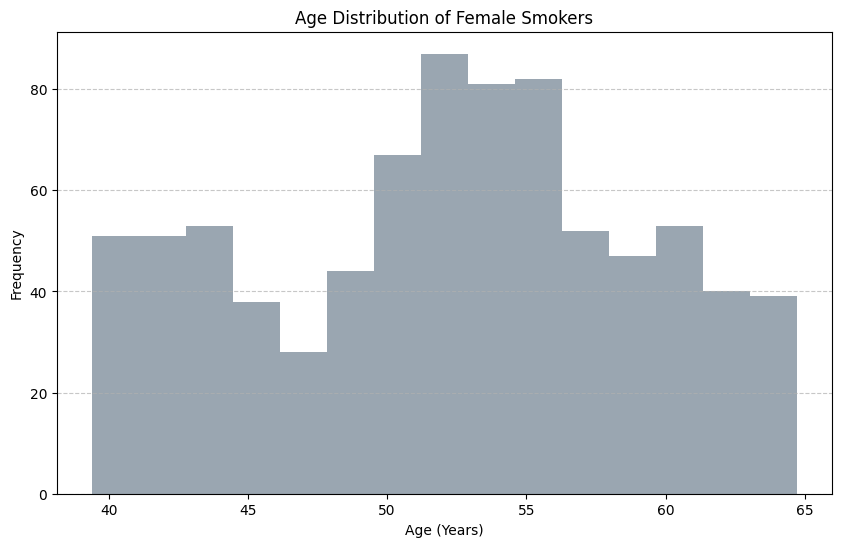

In [37]:
#Plot 5: Age Distribution of Female Smokers

# Define the visualize_data function
def visualize_data(df, column, title, xlabel, ylabel):
    """
    Visualize the distribution of a specific column from the dataset.

    Args:
    df (pd.DataFrame): Dataset to visualize.
    column (str): Column name to visualize.
    title (str): Title of the plot.
    xlabel (str): Label for the x-axis.
    ylabel (str): Label for the y-axis.

    Returns:
    None
    """
    plt.figure(figsize=(10, 6))

    # Set the color to 'plum'
    plt.hist(df[column], bins=15, alpha=0.7, color='slategrey')

    # Customize plot details
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()

# Example: Visualizing the Age Distribution for Female Smokers
visualize_data(combination_1_result, 'age_years', 'Age Distribution of Female Smokers', 'Age (Years)', 'Frequency')



Empty DataFrame
Columns: [id, age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio, age_years, age_group, glucose, smoking_status, alcohol_consumption, physical_activity, cardio_disease_presence]
Index: []


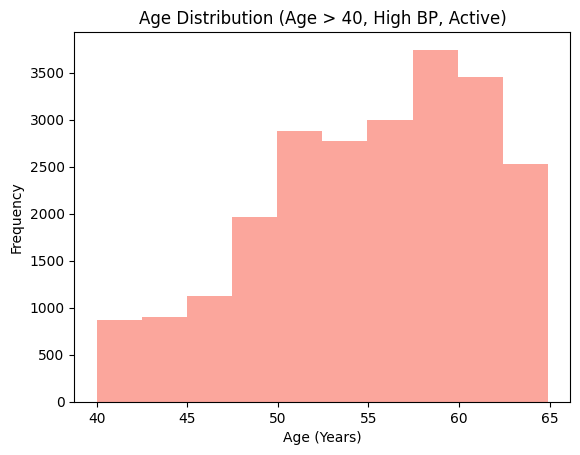

In [44]:
#Plot 6: Age Distribution of high BP, over 40
#Create combination 1 (demographic: female, and lifestyle: smoker)
demographic_lifestyle_combination = df_cleaned[(df_cleaned['gender'] == 1) & (df_cleaned['smoke'] == 1)]
print(demographic_lifestyle_combination.head())

#Create combination 2 (demographic: female, and lifestyle: smoker)
age_cholesterol_combination = df_cleaned[(df_cleaned['age_years'] > 50) & (df_cleaned['cholesterol'] != 'Normal')]
age_bp_activity = df_cleaned[(df_cleaned['age_years'] > 40) & (df_cleaned['ap_hi'] > 120) & (df_cleaned['active'] == 1)]

#histogram of the age distribution for a specific factor combination
plt.hist(age_bp_activity['age_years'], bins=10, alpha=0.7, color='salmon')
plt.title('Age Distribution (Age > 40, High BP, Active)')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.show()

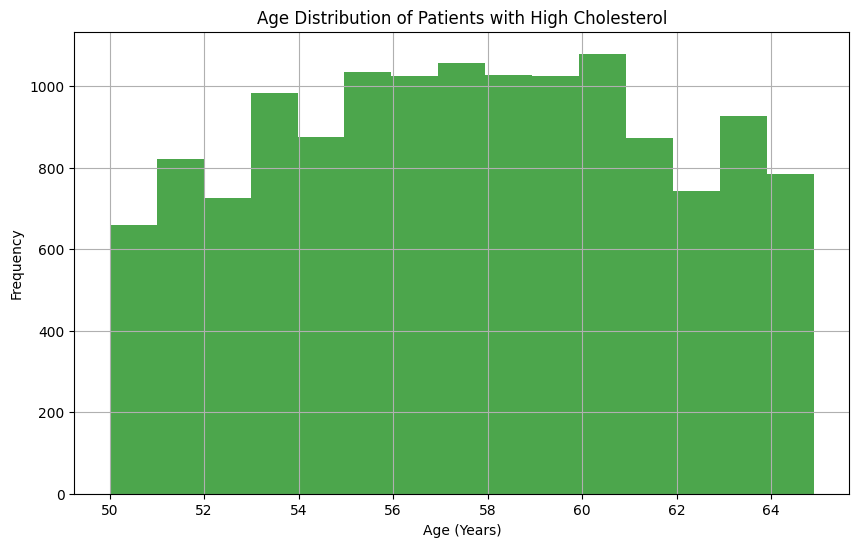

In [19]:

#Plot 7: Age Distribution of Patients with High Cholesterol
# Function to filter based on combinations
def analyze_combination(df, factors):
    """
    Filter a DataFrame based on a combination of demographic, clinical, and lifestyle factors.

    Args:
    df (pd.DataFrame): The DataFrame to filter.
    factors (dict): A dictionary where keys are column names and values are conditions to filter on.

    Returns:
    pd.DataFrame: Filtered DataFrame.
    """
    filtered_df = df.copy()
    for column, condition in factors.items():
        filtered_df = filtered_df.query(f"{column} {condition}")
    return filtered_df

# Function to visualize data
def visualize_data(df, column, title, xlabel, ylabel):
    """
    Visualize the distribution of a specific column from the dataset.

    Args:
    df (pd.DataFrame): Dataset to visualize.
    column (str): Column name to visualize.
    title (str): Title of the plot.
    xlabel (str): Label for the x-axis.
    ylabel (str): Label for the y-axis.

    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=15, alpha=0.7, color='green')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Function to analyze multiple combinations
def analyze_multiple_combinations(df):
    """
    Analyze multiple combinations of Demographic, Clinical, and Lifestyle factors.

    Args:
    df (pd.DataFrame): Cleaned dataset.

    Returns:
    None
    """
    # Combination 1: Gender = Female + Smoking Status = Smoker
    factors_combination_1 = {'gender': "== 'Female'", 'smoking_status': "== 'Smoker'"}
    result_1 = analyze_combination(df, factors_combination_1)

    # Combination 2: Age > 50 + Cholesterol Level is Above Normal or Well Above Normal
    factors_combination_2 = {'age_years': '> 50', 'cholesterol': "!= 'Normal'"}
    result_2 = analyze_combination(df, factors_combination_2)

    # Combination 3: Age > 40 + Blood Pressure (ap_hi > 120) + Active
    factors_combination_3 = {'age_years': '> 40', 'ap_hi': '> 120', 'physical_activity': "== 'Active'"}
    result_3 = analyze_combination(df, factors_combination_3)

    # Visualize Combination 2: Age and Cholesterol Level
    visualize_data(result_2, 'age_years', 'Age Distribution of Patients with High Cholesterol', 'Age (Years)', 'Frequency')

# Analyze multiple combinations
analyze_multiple_combinations(df_cleaned)
